# Exploratory Data Analysis on Global Terrorism Dataset
### Author: Jainam Shah

## Importing libraries and Reading Dataset

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
#importing dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df.head(10)
#encoding in latin1 from UTF-8.
#UTF-8 (Unicode Transformation Format – 8-bit) is a variable-width character encoding used for electronic communication.
#latin1: ISO/IEC 8859-1:1998 aka latin1, Information technology — 8-bit single-byte coded graphic character sets — Part 1.
#some datasets cannot be processed in UTF-8 and need to convert to latin1 or some other character encoding format.

C:\Users\Jainam Shah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


### Data Information before cleaning & preprocessing 

In [354]:
#knowing datasets features
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [355]:
#checking for null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Data Cleaning

In [356]:
#renaming data columns to a proper name
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [357]:
#considering useful data
df = df[['Year','Month','day','Country','State','Region','City','Latitude','Longitude',"Attack_type",'kill',
               'Wound','target1','Summary','Group','Target_type','Weapon','motive']]

In [358]:
#Replacing NaN or Na values to 0 & 1
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)
#Combining kills and wounds to total casualties
df['Casualities'] = df['kill'] + df['Wound']


### Data Information post Data Cleaning

In [359]:
df.head(10)
#print(df.to_string()) is used to extract the whole DataFrame

,Year,Month,day,Country,State,Region,City,Latitude,Longitude,Attack_type,kill,Wound,target1,Summary,Group,Target_type,Weapon,motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0


In [360]:
df.shape

(181691, 19)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_type  181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [362]:
df.describe()

,Year,Month,day,Latitude,Longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [363]:
df.columns

Index(['Year', 'Month', 'day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'Attack_type', 'kill', 'Wound', 'target1',
       'Summary', 'Group', 'Target_type', 'Weapon', 'motive', 'Casualities'],
      dtype='object')

# Exploratory Data Analytics - Visualisations

In [364]:
#total numbers of kill
k = df.loc[:,'kill']
print('Overall number of people died in terrorist attack as per this dataset(1970 to 2017): ', int(sum(k.dropna())))

Overall number of people died in terrorist attack as per this dataset(1970 to 2017):  411868


In [365]:
#data frame for number of people killed in terrorist attack per country
kbc = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
kbc

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


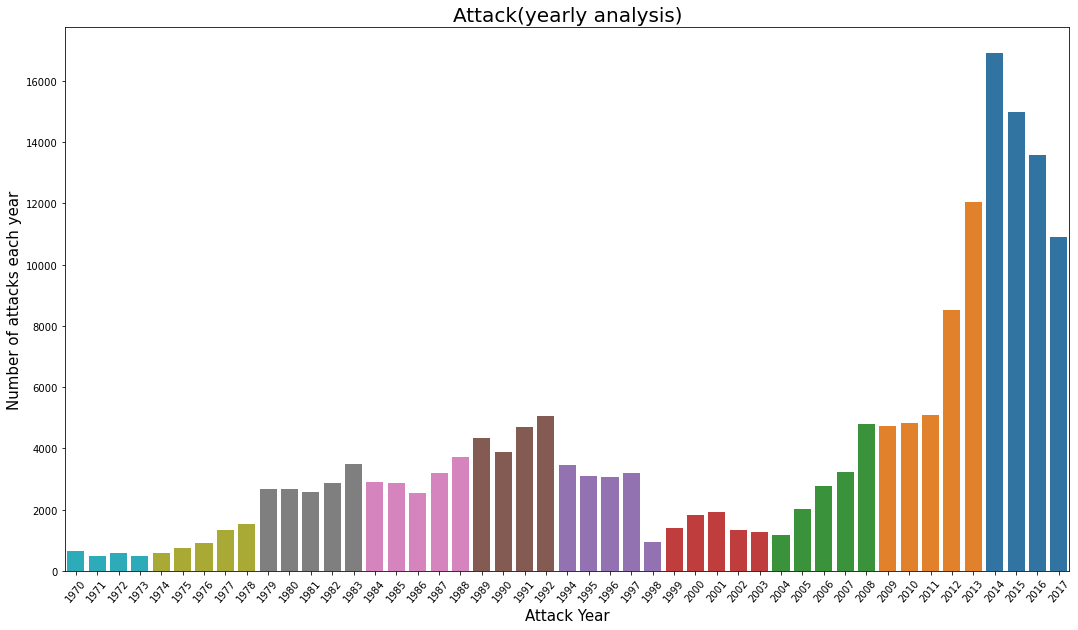

In [366]:
year = df['Year'].unique()
year_count = df['Year'].value_counts(dropna = False).sort_index()
#above "dropna = False" was not really necessary since value_counts() excludes NA values by default
plt.figure(figsize = (18,10))
sns.barplot(x=year, y=year_count, palette = 'tab10_r') #palettes are colour options in seaborn library
plt.xticks(rotation = 50)#this is for making the x co-ordinates rotate by 50 degrees so they wont overlap each other.
plt.title("Attack(yearly analysis)", fontsize=20)
plt.xlabel('Attack Year',fontsize = 15)
plt.ylabel('Number of attacks each year', fontsize=15)
plt.show()

In [367]:
attack = df.Country.value_counts()[:20]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

Text(0.5, 0, 'Country')

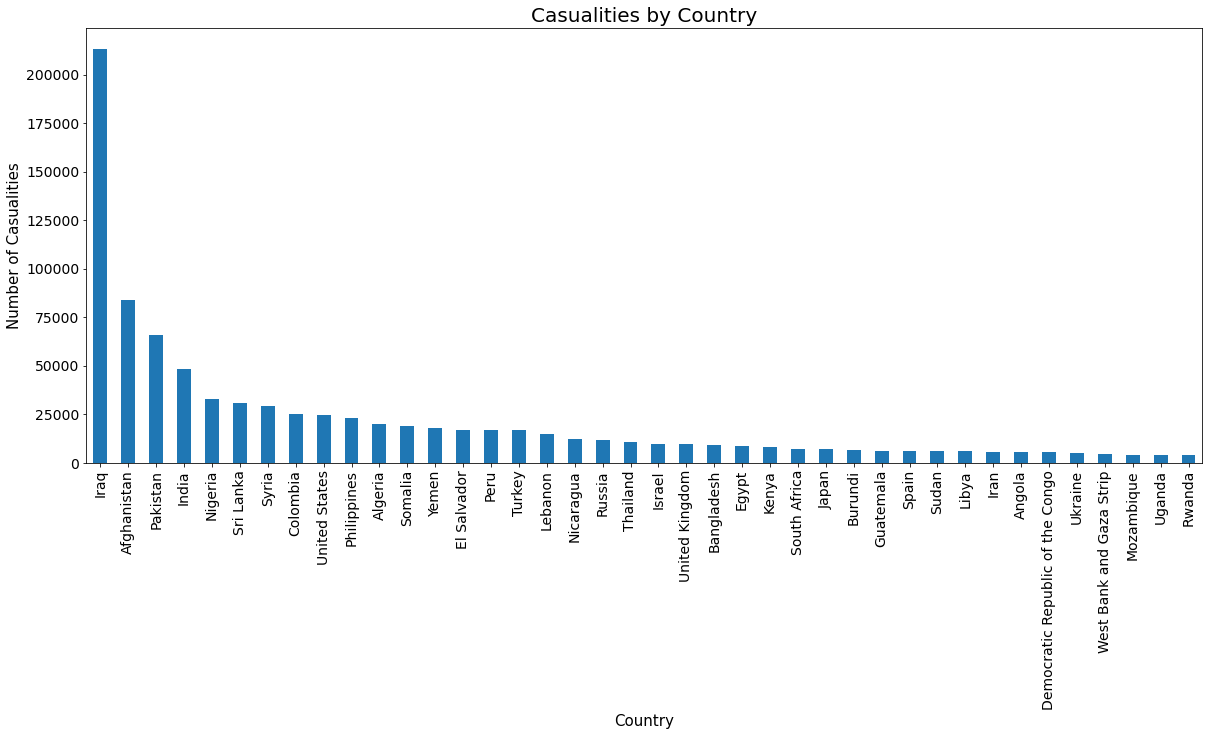

In [368]:
#Casualities by countries
c = df.groupby('Country').Casualities.sum().nlargest(n=40)
c.plot(kind = 'bar',figsize = (20,8),fontsize = 14)
plt.title("Casualities by Country", fontsize=20)
plt.ylabel("Number of Casualities",fontsize=15)
plt.xlabel("Country", fontsize=15)

Text(0.5, 0, 'State')

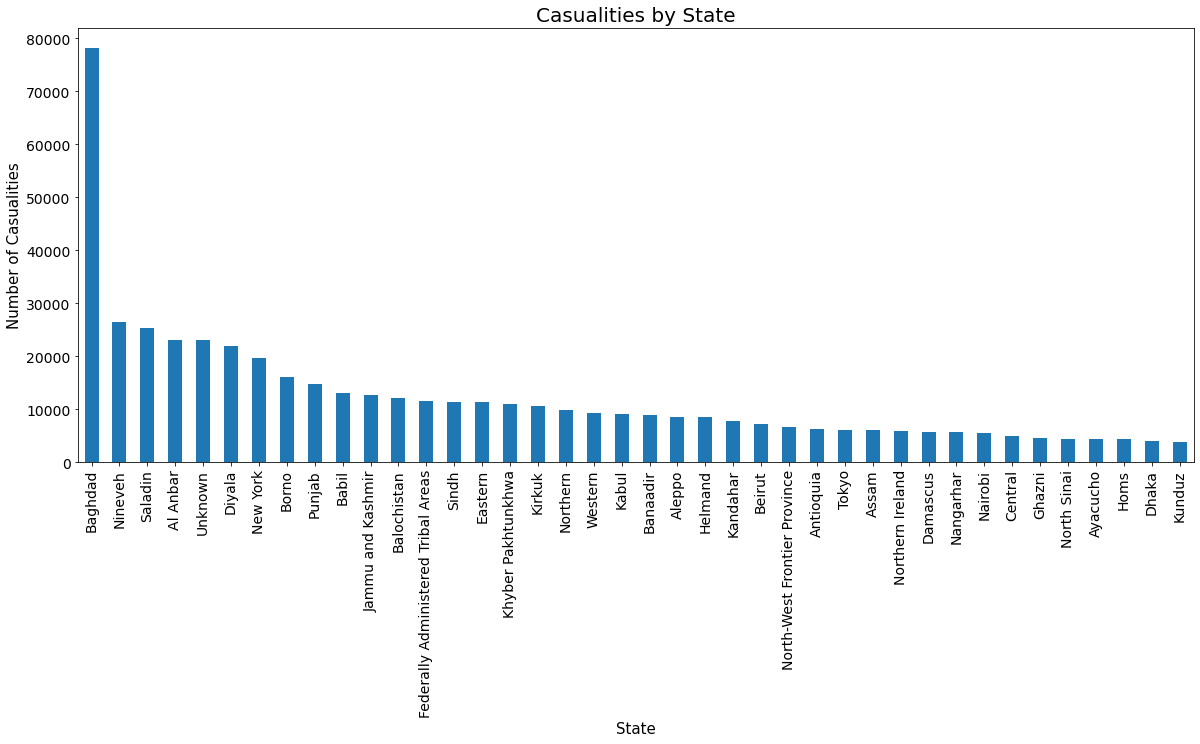

In [369]:
#Casualties by State
st = df.groupby('State').Casualities.sum().nlargest(n=40)
st.plot(kind = 'bar',figsize = (20,8),fontsize = 14)
plt.title("Casualities by State", fontsize=20)
plt.ylabel("Number of Casualities",fontsize=15)
plt.xlabel("State", fontsize=15)

Text(0.5, 0, 'City')

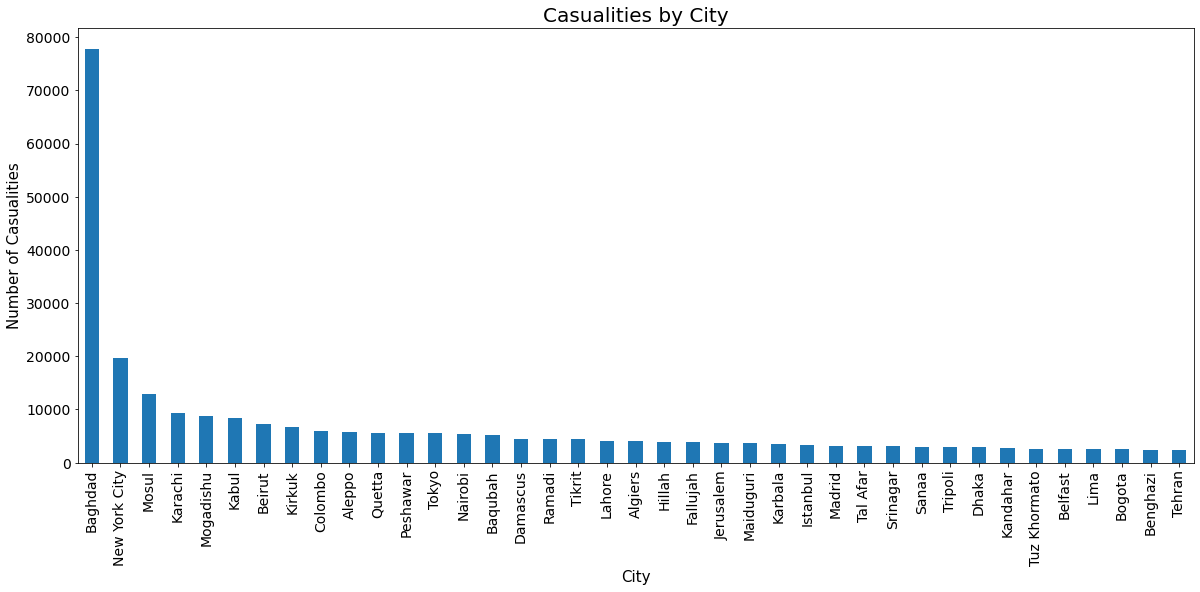

In [370]:
#casualities by city
ct = df.groupby('City').Casualities.sum().nlargest(n=40).drop("Unknown")
ct.plot(kind = 'bar',figsize = (20,8),fontsize = 14)
plt.title("Casualities by City", fontsize=20)
plt.ylabel("Number of Casualities",fontsize=15)
plt.xlabel("City", fontsize=15)

In [371]:
df.Group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [372]:
gck=df[['Group','Country','kill']]
gck=gck.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(11)
gck

C:\Users\Jainam Shah\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


Text(0, 0.5, 'Number of Casualities')

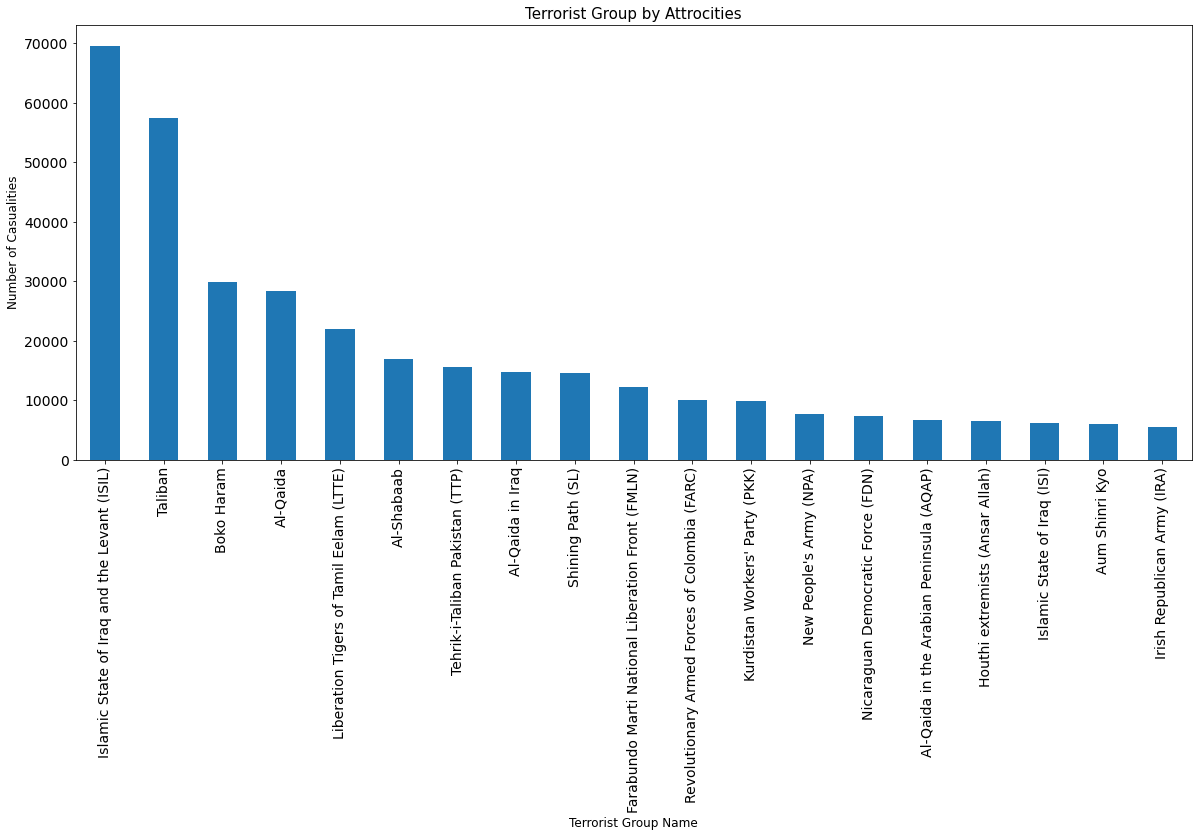

In [373]:
#group with most casualities/attrocities
g = df.groupby('Group').Casualities.sum().nlargest(n=20).drop("Unknown")
g.plot(kind = 'bar',figsize = (20,8),fontsize = 14) 
plt.title("Terrorist Group by Attrocities", fontsize=15)
plt.xlabel("Terrorist Group Name", fontsize=12)
plt.ylabel("Number of Casualities", fontsize=12)

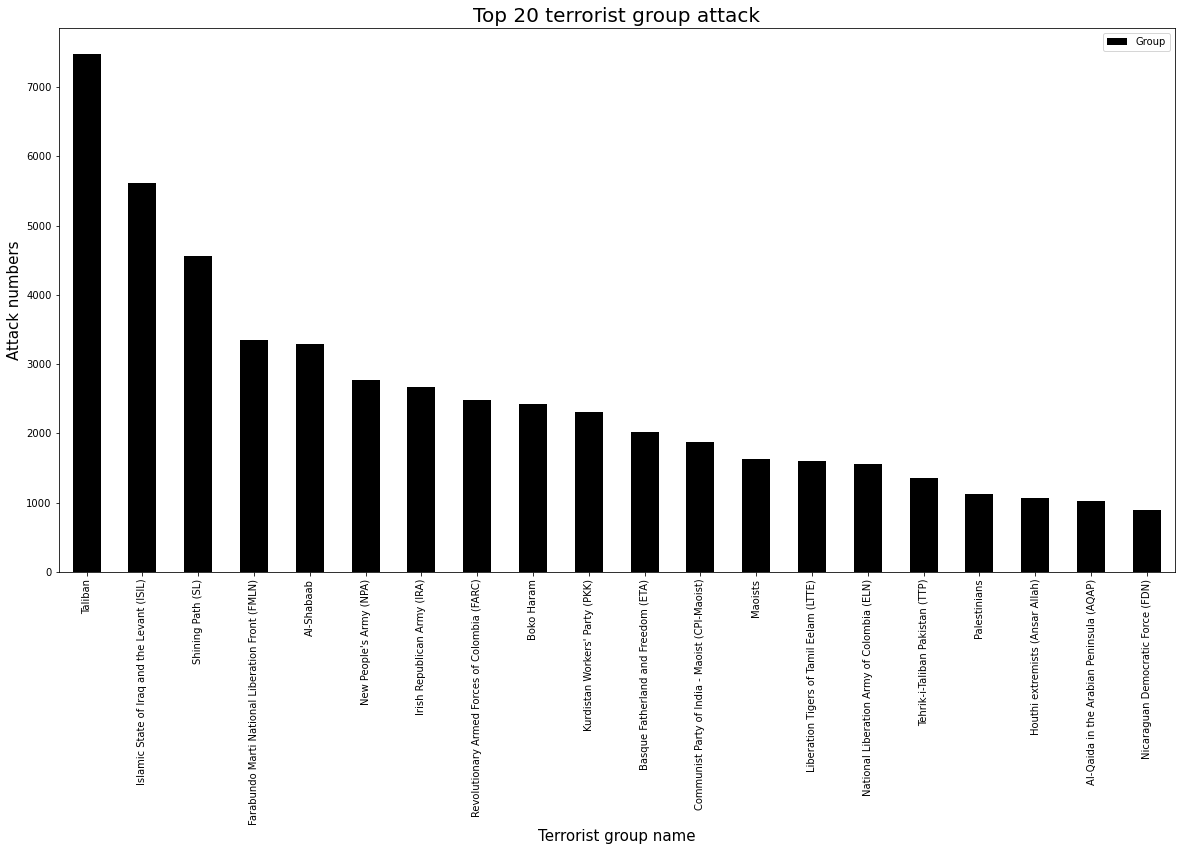

In [374]:
#Terrorist group by most Attacks
df['Group'].value_counts().to_frame().drop('Unknown').head(20).plot(kind='bar',color='black',figsize=(20,10))
plt.title("Top 20 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack numbers",fontsize=15)
plt.show()

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


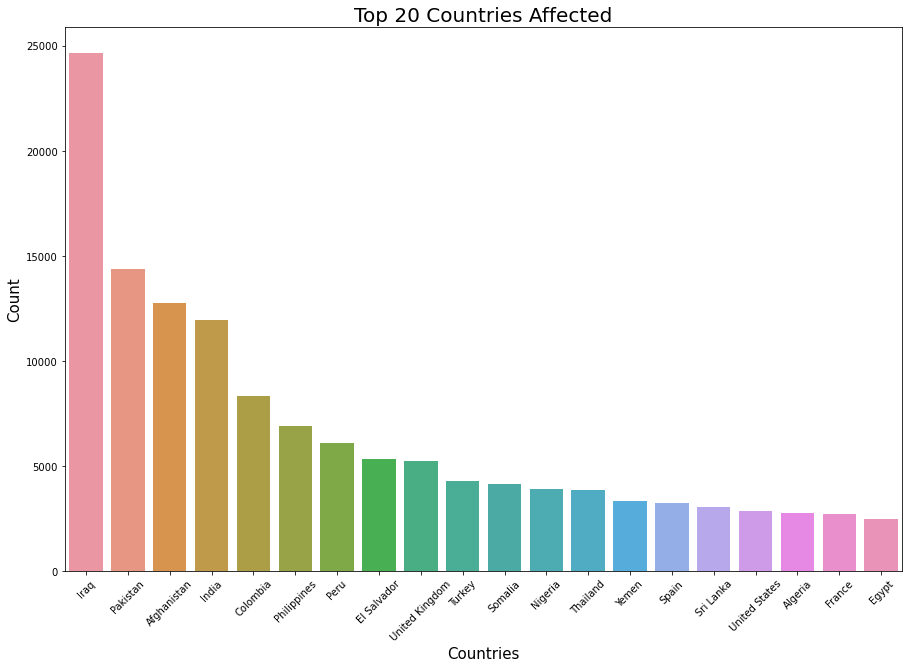

In [375]:
plt.subplots(figsize=(15,10))
sns.barplot(df['Country'].value_counts()[:20].index,df['Country'].value_counts()[:20].values)
plt.title('Top 20 Countries Affected', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 0, 'Year')

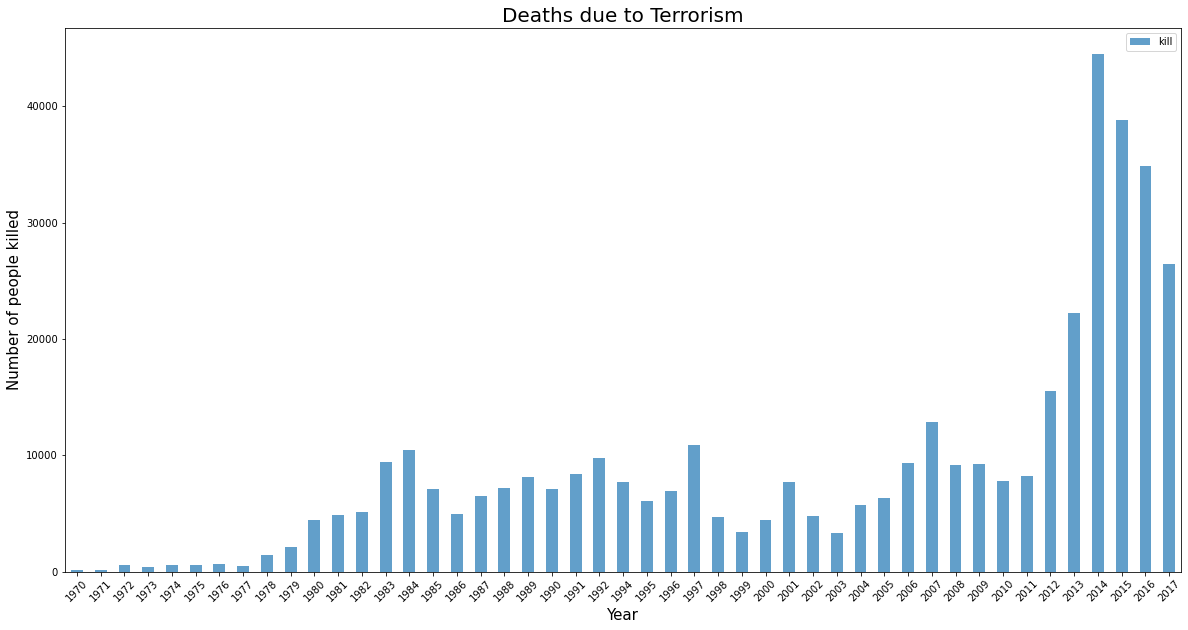

In [376]:
dt = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
dt.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 45)
plt.title("Deaths due to Terrorism",fontsize=20)
plt.ylabel("Number of people killed",fontsize=15)
plt.xlabel('Year',fontsize=15)

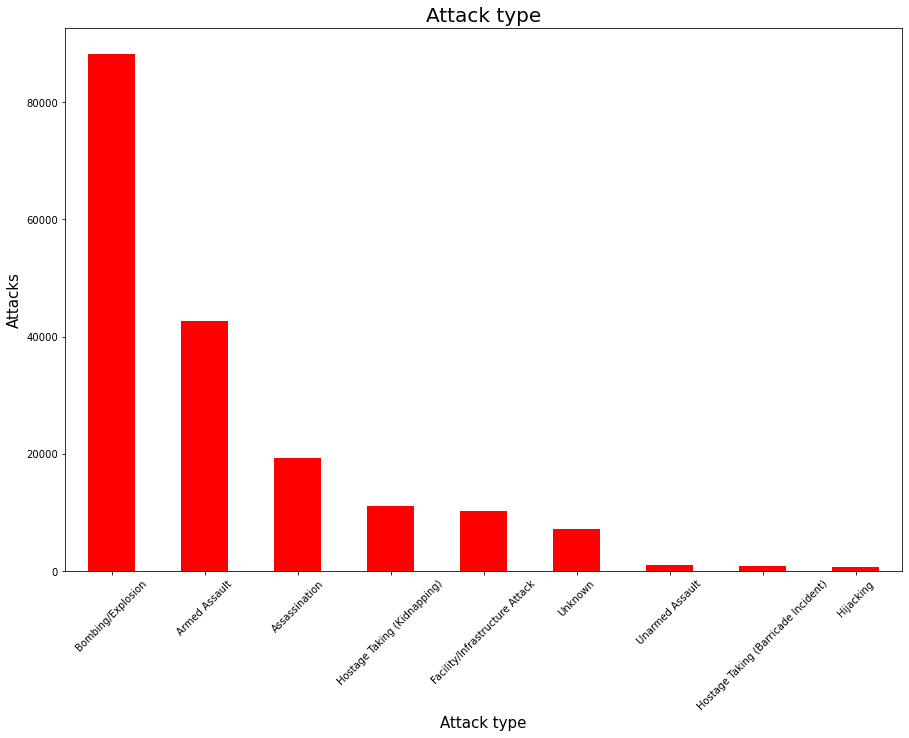

In [377]:
#attack_type
df['Attack_type'].value_counts().plot(kind='bar',figsize=(15,10),color='red')
plt.xticks(rotation = 45)
plt.title("Attack type",fontsize=20)
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("Attacks",fontsize=15)
plt.show()

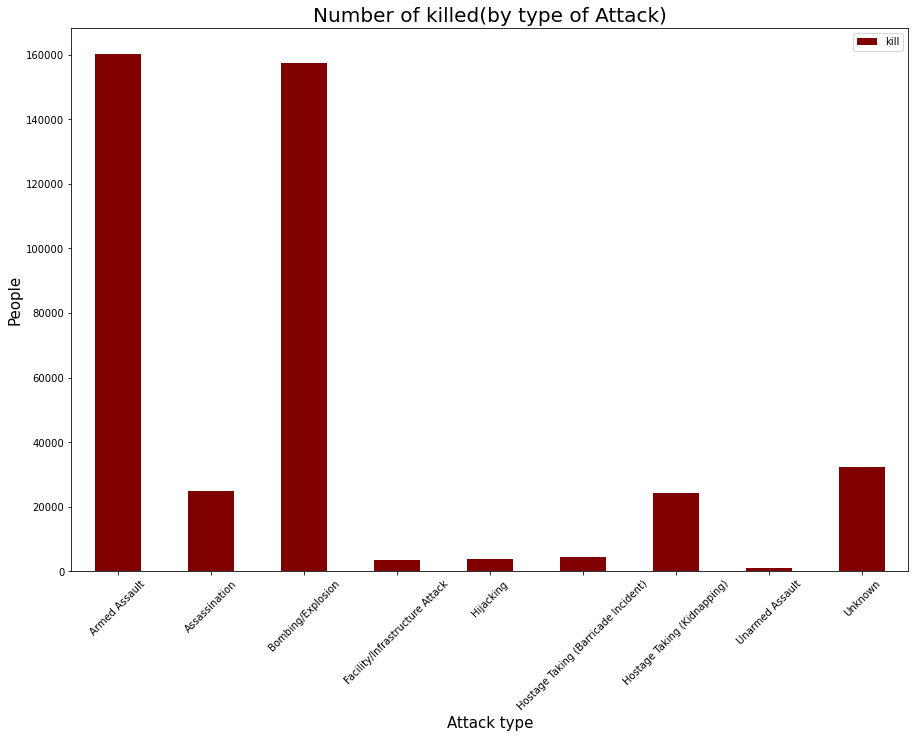

In [378]:
#Number of Casualities in Attack type
df[['Attack_type','kill']].groupby(["Attack_type"],axis=0).sum().plot(kind='bar',figsize=(15,10),color=['maroon'])
plt.xticks(rotation=45)
plt.title("Number of killed(by type of Attack)",fontsize=20)
plt.ylabel('People',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

# Conclusions:
### Total people died due to terrorist attacks as per the dataset (1970-2017): 411868
### Most Terrorist related activities & atrocities took place between 2013 & 2017, in which 2014 had highest attacks & kills.
### Iraq is the most affected country & Baghdad is the most affected city. Number of attacks in Iran are highest i.e, 24636 and Baghdad had most casualities. ISIL Terrorist group is responsible for this. ISIL killed 31058 people in Iraq.
### ISIL & Taliban Terrorist groups have the most terrorist related activities & atrocities.
### Mostly attack took place by Bombings & Explosions.